In [1]:
#debug用

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from pprint import pprint 
from models.models import *
#自作モジュール
from models import my_cv

SyntaxError: unmatched '}' (<ipython-input-1-8bbb7cbba696>, line 5)

(4032, 3024, 3)
(202557,)
(532, 1, 2)


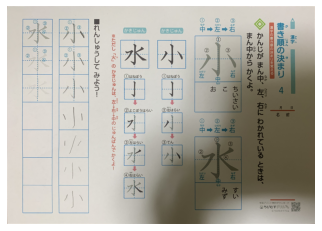

In [4]:
img_ori = cv2.imread('./sample_images/work8.png')#画像読み込み
print(np.shape(img_ori))
#my_cv.display_color(img_ori)
#紙の部分を切り出す
img_paper = my_cv.cutting_paper(img_ori)
my_cv.display_color(img_paper,output_file_path = "./tmp/paper.png")


[[[ 479 1649]]

 [[ 744 1648]]

 [[ 747 1893]]

 [[ 482 1894]]]


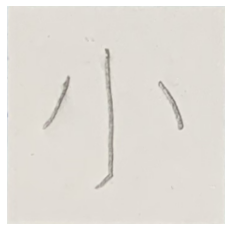

[[[ 147 1647]]

 [[ 409 1647]]

 [[ 413 1892]]

 [[ 149 1894]]]


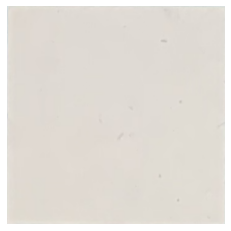

[[[ 478 1395]]

 [[ 743 1393]]

 [[ 745 1640]]

 [[ 480 1642]]]


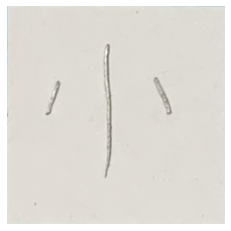

[[[ 147 1395]]

 [[ 409 1393]]

 [[ 410 1640]]

 [[ 148 1640]]]


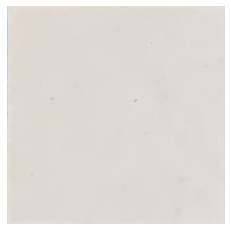

[[[ 480 1141]]

 [[ 744 1138]]

 [[ 743 1386]]

 [[ 480 1387]]]


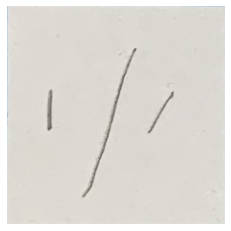

[[[ 144 1140]]

 [[ 410 1139]]

 [[ 411 1385]]

 [[ 149 1386]]]


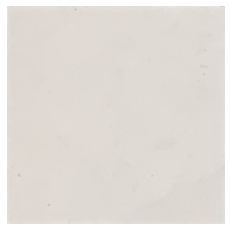

[[[ 480  886]]

 [[ 745  884]]

 [[ 745 1131]]

 [[ 482 1132]]]


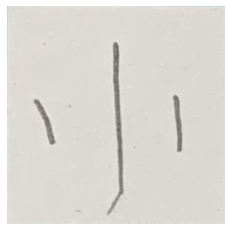

[[[ 145  886]]

 [[ 411  885]]

 [[ 412 1131]]

 [[ 145 1132]]]


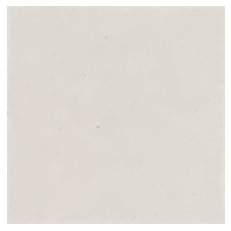

[[[482 632]]

 [[745 630]]

 [[747 876]]

 [[482 878]]]


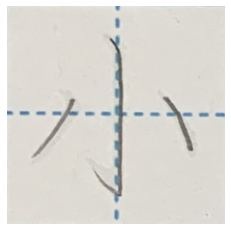

[[[146 631]]

 [[410 630]]

 [[412 876]]

 [[147 878]]]


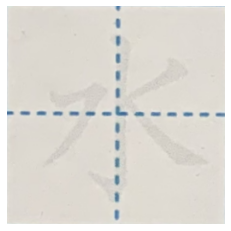

[[[482 378]]

 [[744 376]]

 [[747 623]]

 [[483 624]]]


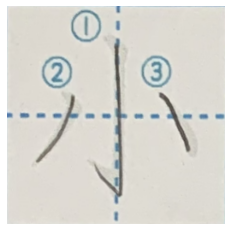

[[[146 377]]

 [[410 376]]

 [[413 622]]

 [[148 624]]]


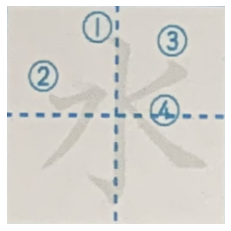

[[[1388  319]]

 [[1637  318]]

 [[1638  568]]

 [[1389  569]]]


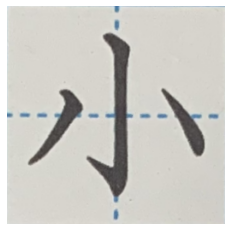

[[[1049  316]]

 [[1300  319]]

 [[1298  569]]

 [[1048  566]]]


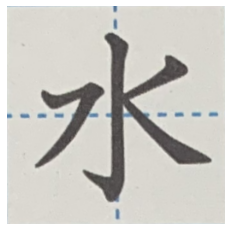

[[[1382  311]]

 [[1644  312]]

 [[1643  575]]

 [[1381  574]]]
[[[1042  310]]

 [[1305  311]]

 [[1304  575]]

 [[1042  572]]]
[[[482 126]]

 [[745 124]]

 [[747 369]]

 [[484 371]]]


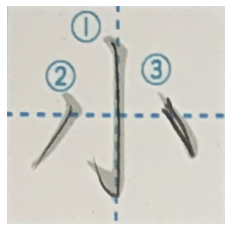

15
[[[ 479 1649]]

 [[ 744 1648]]

 [[ 747 1893]]

 [[ 482 1894]]]
[[[ 147 1647]]

 [[ 409 1647]]

 [[ 413 1892]]

 [[ 149 1894]]]
[[[ 478 1395]]

 [[ 743 1393]]

 [[ 745 1640]]

 [[ 480 1642]]]
[[[ 147 1395]]

 [[ 409 1393]]

 [[ 410 1640]]

 [[ 148 1640]]]
[[[ 480 1141]]

 [[ 744 1138]]

 [[ 743 1386]]

 [[ 480 1387]]]
[[[ 144 1140]]

 [[ 410 1139]]

 [[ 411 1385]]

 [[ 149 1386]]]
[[[ 480  886]]

 [[ 745  884]]

 [[ 745 1131]]

 [[ 482 1132]]]
[[[ 145  886]]

 [[ 411  885]]

 [[ 412 1131]]

 [[ 145 1132]]]


In [2]:
img_paper = cv2.imread('./tmp/paper.png')#debug用
paper = Paper(img_paper,"Sho","Mizu")

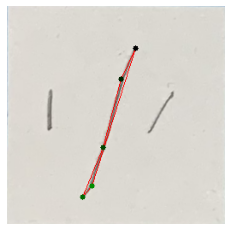

a


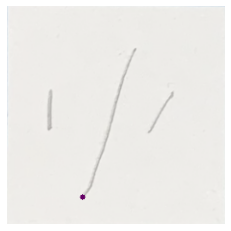

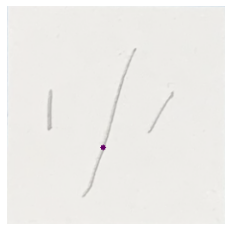

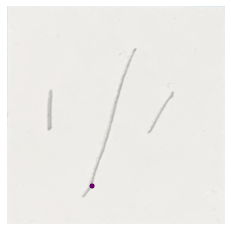

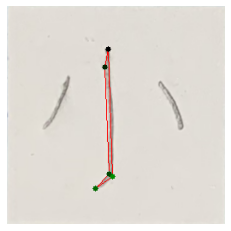

a


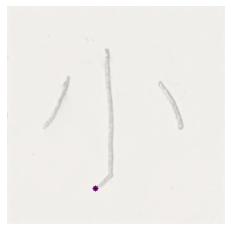

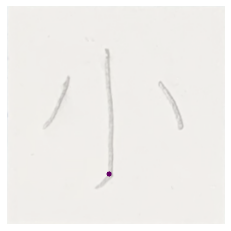

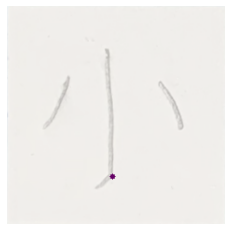

In [3]:
#scoreの取得
score1s , score2s = paper.get_scores(True)

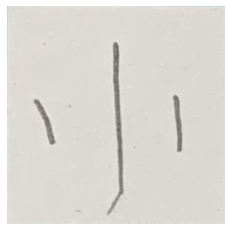

=====小======
ただしく３ほんせんがひけてるね
おてほんどおり１かくめをかこう
２かくめのさいごはしっかりはねよう
３かくめがきれいにかけてるね


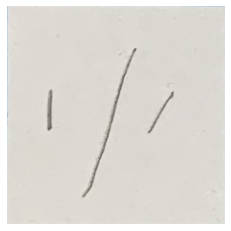

=====小======
ただしく３ほんせんがひけてるね
おてほんどおり１かくめをかこう
２かくめのはねをかくにんしよう
まんなかのせんはまっすぐひこう
３かくめのかたちをかくにんしよう


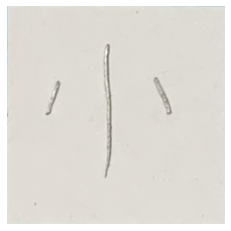

=====小======
ただしく３ほんせんがひけてるね
１かくめがきれいにかけてるね
２かくめのさいごはしっかりはねよう
３かくめがきれいにかけてるね


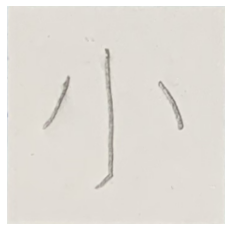

=====小======
ただしく３ほんせんがひけてるね
１かくめがきれいにかけてるね
２かくめのはねをかくにんしよう
３かくめがきれいにかけてるね


In [4]:
for score in score1s:
    my_cv.display_color(score.get_img())
    score.print_debug()

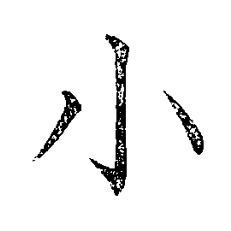

In [5]:
my_cv.display_gray(score1s[0].get_img_exp())

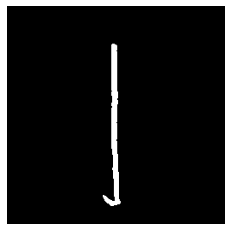

(255, 255, 3)
(255, 255, 3)


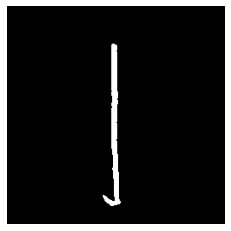

(21, 21, 3)


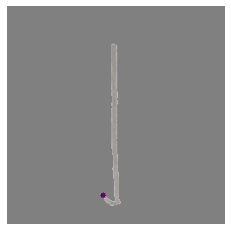

(2,)


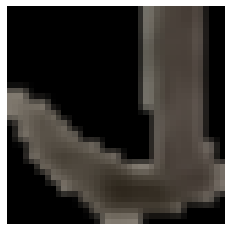

In [5]:
#rectの抽出のデバッグ
char = paper.char1s[1]
contour = char.basic_contours[1]
img_thresh = contour.img_thresh
my_cv.display_gray(contour.img_thresh)

img_thre_color = np.stack([img_thresh,img_thresh,img_thresh],axis = 2)
img = img_thre_color.reshape([255,255,3])
print(np.shape(img))
print(np.shape(img_thre_color))
my_cv.display_color(img)
dst = cv2.bitwise_and(char.img_char, img_thre_color)
right_bottom_point = [contour.max_x_point[0],contour.max_y_point[1]]#右下のポイント


width = 20
img_slice = dst[right_bottom_point[1]-width:right_bottom_point[1]+1,right_bottom_point[0]-width:right_bottom_point[0]+1,:]
print(np.shape(img_slice))

left_point = [contour.min_x_point[0],contour.min_x_point[1]]#左端のポイント
my_cv.display_point(dst,left_point)
print(np.shape(left_point))
img_fit = cv2.resize(img_slice,dsize=(40,40))



my_cv.display_color(img_fit)

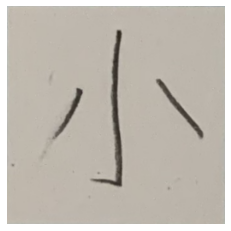

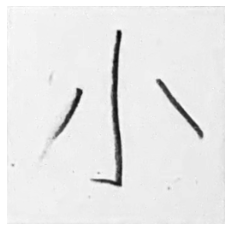

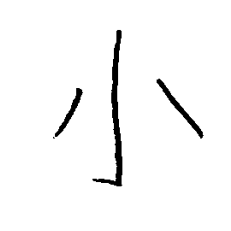

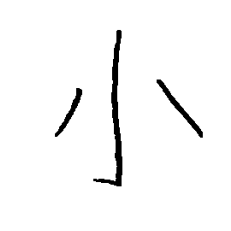

In [7]:
#輪郭の精度向上 変なフィルターかまさんほうが強そう
char = paper.char1s[0]
img = np.copy(char.img_sq)
my_cv.display_color(img)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
my_cv.display_gray(hsv[:,:,2])
_, img_thresh = cv2.threshold(hsv[:,:,2], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
img_th_fltr = cv2.morphologyEx(img_thresh,cv2.MORPH_CLOSE,kernel)
#img_thresh = cv2.bitwise_not(img_thresh)
my_cv.display_gray(img_thresh)
my_cv.display_gray(img_th_fltr)